### Задание 3.7

Какие события будут независимыми при подбрасывании идеального (равностороннего) кубика?

In [53]:
def raw(a,b):
    a=set(a)
    b=set(b)
    p=1/6
    x=(len(a)*p)*(len(b)*p)
    y=len(a&b)*p
    return x==y

print('A «Выпало чётное число очков» и «Выпало нечётное число очков»')
print(raw([2,4,6],[1,3,5]))
print('B «Выпало чётное число очков» и «Выпало не больше 2 очков»')
print(raw([2,4,6],[1,2]))
print('C «Выпало чётное число очков» и «Выпало количество очков, большее или равное 3»')
print(raw([2,4,6],[3,4,5,6]))
print('D «Выпало чётное число очков» и «Выпало количество очков, большее или равное 2»')
print(raw([2,4,6],[2,3,4,5,6]))

A «Выпало чётное число очков» и «Выпало нечётное число очков»
False
B «Выпало чётное число очков» и «Выпало не больше 2 очков»
True
C «Выпало чётное число очков» и «Выпало количество очков, большее или равное 3»
True
D «Выпало чётное число очков» и «Выпало количество очков, большее или равное 2»
False


In [54]:
import numpy as np
DV = lambda x,p:sum(x**2*p)-(sum(x*p)**2)

a=np.array([89, 90, 93, 98, 100, 102, 102, 103, 105, 105, 106, 107])
b=np.array([56, 122, 56, 85, 160, 98, 102, 218, 23, 180, 42, 58])
p=np.ones(12)*1/12

E_x=sum(a*p)
E_xx=sum(a**2*p)
print('a',E_xx-(E_x**2))
print('b',DV(b,p))

a 35.50000000000364
b 3297.5


In [55]:
import numpy as np
a=[-1, 0, 1, 3]
p=[0.05, 0.8, 0.1, 0.05]


a=np.array(a)
p=np.array(p)

E_x=sum(a*p)
E_xx=sum(a**2*p)
print(E_xx-E_x**2)
DV(a,p)

0.56


0.56

### Задание 7.7
Случайная величина задана таблицей:

In [56]:
a=np.array([-1, 0, 1, 2])
p=np.array([0.5, 0.2, 0.2, 0.1])
print(round(np.sqrt(DV(a,p)),2),'стандартное отклонение ')

1.04 стандартное отклонение 


# Равномерное распределение

Для равномерного распределения уже известны математическое ожидание
$$EX = \frac{N+1}{2}$$
и стандартное отклонение
$$\sigma_X = \sqrt{\frac{N^2 - 1}{12}}$$

numpy и функцию randint() из библиотеки scipy, предназначенную для моделирования равномерного дискретного распределения:

In [57]:
import numpy as np
from scipy.stats import randint

In [58]:
# Задаём возможные значения случайной величины
x = np.arange(1, 7) # array([1, 2, 3, 4, 5, 6])
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 7)
# Вычисляем вероятности выпадения каждого значения случайной величины
pmf = disc_uni_dist.pmf(x)

Получаем вероятности для каждого из шести значений:

In [59]:
pmf

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

Также мы можем найти кумулятивную вероятность для распределения, то есть для каждого  вероятность того, что случайная величина примет значение  или меньше

In [60]:
# Рассчитаем кумулятивную вероятность
cdf = disc_uni_dist.cdf(x)

print(cdf)

[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


### Пример

Вы участвуете в розыгрыше бесплатного места на новый курс по Data Science. Вы знаете, что участников 250.

Какова вероятность, что на курс попадёт кто-то из первых пятидесяти зарегистрировавшихся?

In [61]:
# Задаём возможные значения случайной величины
x = np.arange(1, 251)
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 251)
# Вычисляем вероятности выпадения каждого значения случайной величины
cdf = disc_uni_dist.cdf(x)
# Ищем вероятность того, что на курс попадёт кто-то из первых 50 зарегистрировавшихся
print('0-50',cdf[49])
print('0-51:100',cdf[50:99])

0-50 0.2
0-51:100 [0.204 0.208 0.212 0.216 0.22  0.224 0.228 0.232 0.236 0.24  0.244 0.248
 0.252 0.256 0.26  0.264 0.268 0.272 0.276 0.28  0.284 0.288 0.292 0.296
 0.3   0.304 0.308 0.312 0.316 0.32  0.324 0.328 0.332 0.336 0.34  0.344
 0.348 0.352 0.356 0.36  0.364 0.368 0.372 0.376 0.38  0.384 0.388 0.392
 0.396]


# Распределение Бернулли

$$P(X = x)= \left\{\begin{matrix} p & x = 1\\ 1 - p & x = 0 \\ \end{matrix}\right.$$
Для этого распределения также известны математическое ожидание
$$EX = 1 \cdot p + 0 \cdot (1-p) = p$$
и стандартное отклонение
$$\sigma_X = \sqrt{p(1-p)}$$

С помощью специальной функции bernoulli.rvs() из библиотеки scipy мы можем смоделировать распределение Бернулли и, например, увидеть ожидаемое соотношение попаданий и промахов для решённой задачи, если будет сделано 500 выстрелов:

c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


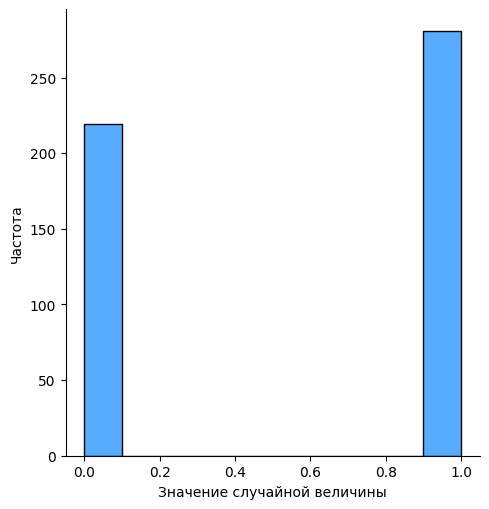

In [62]:
from scipy.stats import bernoulli
import seaborn as sns

data = bernoulli.rvs(size=500, p=0.6)
ax = sns.displot(data, kde=False, color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

Также можно вывести количество неудач и попаданий в нашей модели:

In [63]:
unique, counts = np.unique(data, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 219]
 [  1 281]]


# Биномиальное распределение

$$P(X = k) = \begin{pmatrix} n \\ k \end{pmatrix} p^k (1-p)^{n-k}$$
$\begin{pmatrix} n \\ k \end{pmatrix}$ называют биномиальным коэффициентом, и он вычисляется следующим образом
$$\frac{n!}{k! (n-k)!}$$
Математическое ожидание биномиального распределения равно:
$$EX = np$$
Стандартное отклонение:
$$\sigma_X = \sqrt{np (1-p)}$$

### Пример
Производитель гаджетов знает, что 20 % производимых им товаров — бракованные.

Если он производит десять изделий в день, какова вероятность того, что не более двух из них бракованные?

$$\begin{pmatrix} 10 \\ 8 \end{pmatrix} (0.8)^8 (0.2)^2 + \begin{pmatrix} 10 \\ 9 \end{pmatrix} (0.8)^9 (0.2)^1 + \begin{pmatrix} 10 \\ 10 \end{pmatrix} (0.8)^{10} \approx 0.678$$

In [18]:
import scipy

print(scipy.stats.binom.pmf(8,10,0.8)+scipy.stats.binom.pmf(9,10,0.8)+scipy.stats.binom.pmf(10,10,0.8))

result=0
for i in range(8,11):
    result+=scipy.stats.binom.pmf(i,10,0.8)
print(result)

0.6777995264
0.6777995264


Как и для распределения Бернулли, для биномиального распределения можно смоделировать какое-то количество попыток и получить результат. Например, можно смоделировать биноминальное распределение с параметром p = 0.5 и количеством испытаний, равным 10, и реализовать 1000 попыток:

c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


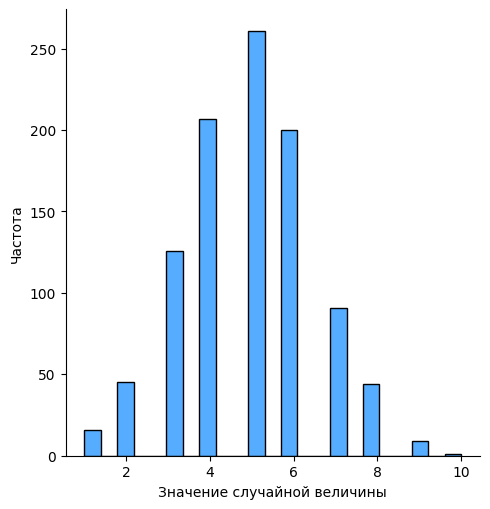

In [65]:
from numpy import random
import seaborn as sns

data = random.binomial(n=10, p=0.5, size=1000)
ax = sns.displot(data, kde=False, color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

Можно видеть, что чаще всего можно наблюдать пять успешных исходов.

# Распределение Пуассона

В распределении Пуассона значение случайной величины может быть любым неотрицательным числом.  Случайная величина будет обладать следующими характеристиками:
$$EX  = \lambda$$
$$\sigma_X = \sqrt{\lambda},$$
где $\lambda$ — ожидаемое число событий за период времени.

Чтобы рассчитать вероятность того, что за период времени произойдёт  событий, можно пользоваться следующей формулой:
$$P(X = k) = \frac{\lambda^k e^{- \lambda}}{k!}$$

In [66]:
import scipy

scipy.stats.distributions.poisson.pmf(5, 4.5)

0.17082685848611215

c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


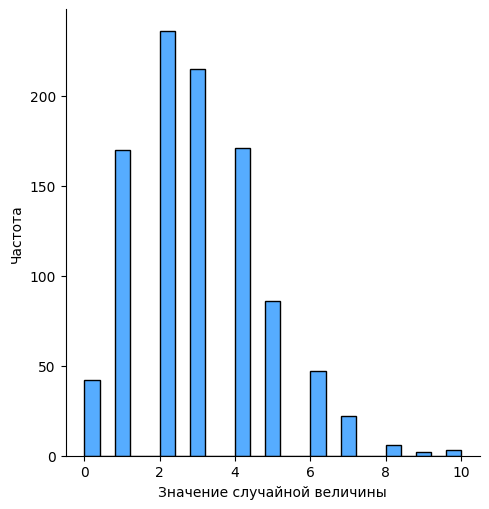

In [6]:
from numpy import random
import seaborn as sns

data = random.poisson(lam=3, size=1000)
ax = sns.displot(data, kde=False, color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

### Задание 8.3
Вы стреляете по мишени. Вероятность набрать максимальное количество очков составляет 7 %. В этом случае вы выиграете плюшевого медведя стоимостью 5000 рублей. Если наберёте меньше максимума, то не выиграете ничего.

Сколько должен стоить билет, чтобы обеспечить игру, в которой выигрыш равен вашим ожидаемым затратам и ожидаемым затратам продавца?

In [68]:
p=0.07
s=5000

print(s*p+0*(1-p),' стоить билет')

350.00000000000006  стоить билет


### Задание 8.4
Вы купили 85 лотерейных билетов. Для каждого из них вероятность выигрыша составляет 0.001.

Найдите математическое ожидание для количества выигрышных билетов.

In [69]:
k=85
p=0.001
print(k*p,' математическое ожидание для количества выигрышных билетов')

0.085  математическое ожидание для количества выигрышных билетов


### Задание 8.5
Иван Петрович 20 лет живёт в доме, в котором 30 лифтов и одна кнопка для их вызова. За это время он провёл много измерений и предполагает, что если нажать на кнопку, то количество лифтов, пришедших за минуту, подчиняется распределению Пуассона, с $\lambda=2$. Это значит, что:

$$P(X = k) = \frac{\lambda^k e^{- \lambda}}{k!}$$

c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Это значит, что: в среднем приходит [(1,)] лифта за минуту


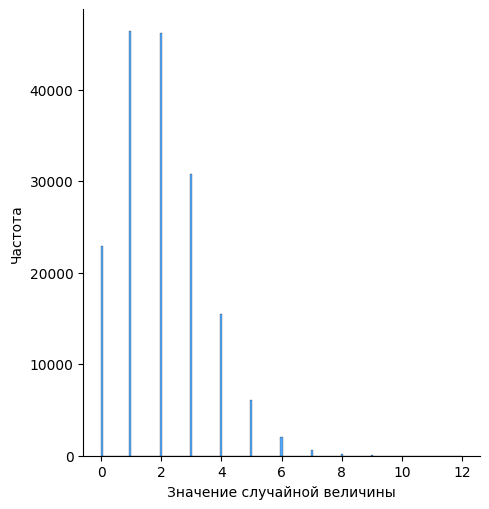

In [35]:
from numpy import random
# import numpy as np
import seaborn as sns
import pandas as pd
yeur=20*356*24
alf=2
k=30

data = random.poisson(lam=alf, size=yeur)
ax = sns.displot(data, kde=False, color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

print(f'Это значит, что: в среднем приходит {list(pd.DataFrame(data).value_counts().head(1).index)} лифта за минуту')


### Задание 8.6
Сеть ресторанов быстрого питания проводит акцию, в рамках которой в одной из четырёх коробок картофеля фри лежит купон на бесплатную коробку картофеля фри. Предположим, что где-то продаётся 100 таких коробок в день. Пусть $x$ равно количеству выигранных купонов за день.

Найдите среднее значение и стандартное отклонение для $x$. Если результат дробное число, округлите ответ до одного знака после точки-разделителя.

Биномиальное распределение
$$EX = np$$
$$\sigma_X = \sqrt{np (1-p)}$$

In [71]:
n=100
p=1/4 # 1 прриз на 4 коробки
print('среднее значение =',n*p)
print('стандартное отклонение =',round(np.sqrt(n*p*(1-p)),1))

среднее значение = 25.0
стандартное отклонение = 4.3


### Задание 8.7
Пассажиры прибывают на вокзал со средней скоростью $\lambda=4$ человека в минуту.

Если количество пассажиров, приезжающих на вокзал, подчиняется распределению Пуассона, какова приблизительная вероятность того, что 16 пассажиров приедут на вокзал в конкретный четырёхминутный период? Округлите ответ до трёх знаков после точки-разделителя.

In [72]:
lam=4 # 4 человек в минуту
n=16
s=4
print('приблизительная вероятность =',round(scipy.stats.distributions.poisson.pmf(n, lam*s),3))

приблизительная вероятность = 0.099


# Равномерное распределение

$$ EX = \frac{a+b}{2} $$
$$ \sigma_X = \frac{b-a}{\sqrt{12}} $$

Мы можем с помощью Python смоделировать случайную величину c таким распределением и визуализировать плотность её распределения. К примеру, сформируем выборку объёмом 10000 для распределения с параметрами  и :

c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


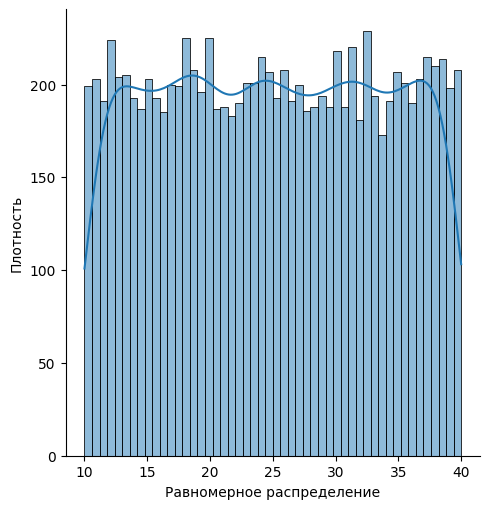

In [73]:
from scipy.stats import uniform
import seaborn as sns

data = uniform.rvs(size=10000, loc=10, scale=30)
ax = sns.displot(data, kde=True, bins=50)
ax.set(xlabel='Равномерное распределение', ylabel='Плотность')

# Нормальное распределение

стандартное отклонение
$$X \sim Normal (\mu, \sigma^2)$$
Плотность нормального распределения задаётся формулой:
$$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{- \frac{(x - \mu)^2}{2 \sigma^2}}$$

c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


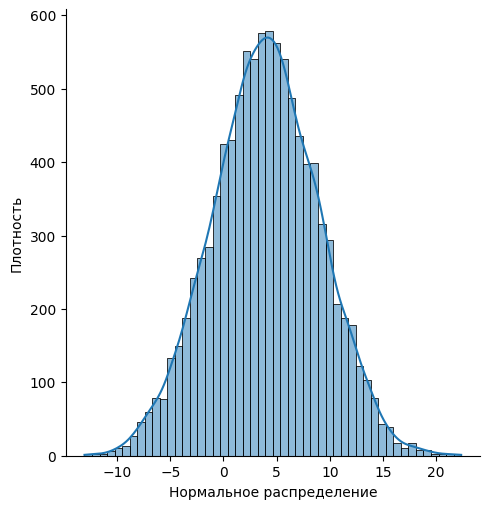

In [74]:
from scipy.stats import norm
import seaborn as sns

data = norm.rvs(size=10000, loc=4, scale=5)
ax = sns.displot(data, kde=True, bins=50)
ax.set(xlabel='Нормальное распределение', ylabel='Плотность')

In [75]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
data = asarray([[93, 44],
                [4, 2],
                [36, 1],
                [14, 29],
                [78, 21]])
print(data)
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
print(scaled)

[[93 44]
 [ 4  2]
 [36  1]
 [14 29]
 [78 21]]
[[ 1.37243726  1.50201177]
 [-1.17229016 -1.06239857]
 [-0.25733199 -1.12345596]
 [-0.88636573  0.58615094]
 [ 0.94355062  0.09769182]]


# Экспоненциальное распределение

Плотность экспоненциального распределения задаётся следующей формулой:
$$f(x) = \left\{\begin{matrix} 0, & x < 0 \\ \lambda e^{- \lambda x}, & x \geq 0 \\ \end{matrix}\right.$$
В качестве параметра $\lambda$ здесь берётся ожидаемое число событий за единицу времени

Математическое ожидание для этого распределения вычисляется по следующей формуле:
$$EX =  1/ \lambda$$
Стандартное отклонение можно найти ровно так же:
$$\sigma_X =  1/ \lambda$$
Вероятность того, что значение случайной величины будет не больше \(x\), равна:
$$1 - e^{- \lambda x}$$

c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


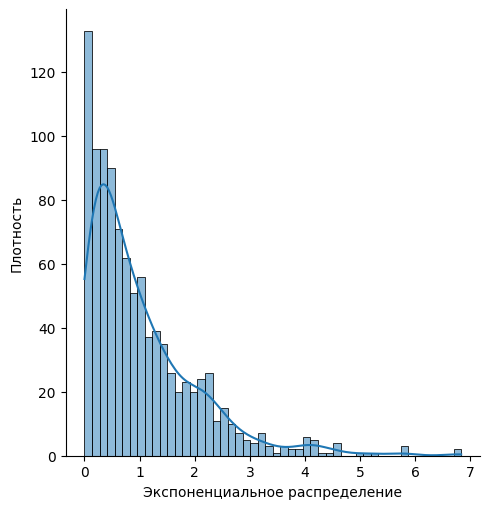

In [1]:
from scipy.stats import expon
import seaborn as sns

data = expon.rvs(scale=1, loc=0, size=1000)
ax = sns.displot(data, kde=True, bins=50)
ax.set(xlabel='Экспоненциальное распределение', ylabel='Плотность')

Дней=15

В качестве параметра распределения здесь используется $\lambda = 1 / дней $ тогда $\lambda = 1/15$

X<10  тогда задаём X=10

$$P(X < 10) = 1 - e^{- \lambda * X} = 1 - e^{- \lambda * 10} = 0.4865$$


### Задание 9.3
Иван Петрович 20 лет живёт в доме, в котором 30 лифтов и одна кнопка для их вызова. За это время он выявил, что если нажать на кнопку, то количество лифтов, пришедших за минуту, подчиняется экспоненциальному распределению с $\lambda = 2$. Это значит, что...

c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


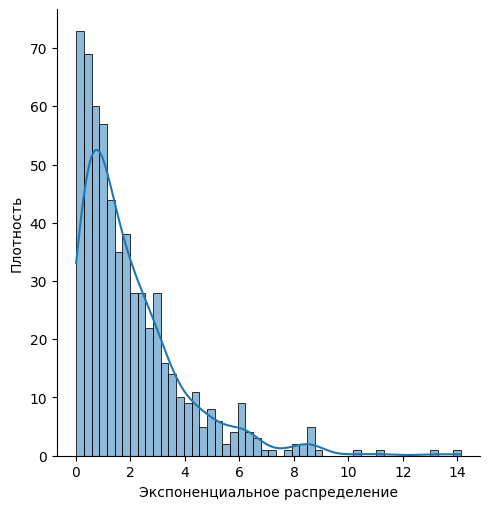

In [60]:
year=20
alf=2
k= 30

# import numpy as np
from scipy.stats import expon
import seaborn as sns

data = expon.rvs(scale=alf, loc=0, size=k*year)
ax = sns.displot(data, kde=True, bins=50)
ax.set(xlabel='Экспоненциальное распределение', ylabel='Плотность')

### Задание 9.4
В среднем новый холодильник служит 10 лет. Предположим, что продолжительность времени службы распределена экспоненциально.

Лет=10

В качестве параметра распределения здесь используется $\lambda = 1 / Лет $ тогда $\lambda = 1/10$
1. Какова вероятность того, что холодильник прослужит более 7 лет?
+ X>7  тогда задаём X=7 от 7 до максимума $$1-(1-e^{- \lambda * X})$$
+ а если X<7  тогда задаём X=7 $$1-e^{- \lambda * X}$$

$$P(X > 7) = 1-(1-e^{- \lambda * X}) = 1-(1-e^{- \lambda * 7}) = 0.497$$

2. Какова вероятность того, что устройство прослужит от 9 до 11 лет?
+ $X_1>9$  тогда задаём $X_1=9$ $$1-(1-e^{- \lambda * X_1})$$
    * но мы ограничены $X_2<11$ 

+ $X_2<11$  тогда задаём $X_2=9$ $$1-e^{- \lambda * X_2}$$

$$P(9 < X < 11) = (1-e^{- \lambda * X_2})-(1-e^{- \lambda * X_1}) =( 1-e^{- \lambda * 11}) - (1-e^{- \lambda * 9}) = $$

In [66]:
import numpy as np
year=10
x=7
alf=1/year

print(round(1-(1-np.e**(-1*alf*x)),3), '= вероятность того, что холодильник прослужит более 7 лет')
print(round((1-np.e**(-1*alf*11))-(1-np.e**(-1*alf*9)),3),' = вероятность того, что устройство прослужит от 9 до 11 лет')

0.497 = вероятность того, что холодильник прослужит более 7 лет
0.074  = вероятность того, что устройство прослужит от 9 до 11 лет


### Задание 10.1
В вашем офисе стоят два автомата, с кофе и с чаем. Вероятность того, что к концу дня ваши коллеги выпьют весь кофе, равна $0.2$. Для чая соответствующая вероятность равна $0.3$.

Найдите вероятность того, что хотя бы в одном из автоматов закончится напиток.

Считайте, что напитки заканчиваются независимо друг от друга.

1. Закончились и кофе, и чай;
2. Закончился только чай, но не кофе;
3. Закончился только кофе, но не чай.
$$0.2*0.3 + 0.8*0.3 + 0.2*0.7 = 0.44$$

### Задание 10.2
Вы находитесь на благотворительном мероприятии и приобрели один билет для участия в розыгрыше.

Вам сообщают, что на мероприятии будет 200 человек (включая вас), и примерно $\frac{3}{4}$ участников мероприятия приобрели билеты на розыгрыш. Из этих людей равное количество купило один, два и три билета соответственно.

Если основываться на этих оценках и предполагать, что победитель будет только один, какова вероятность того, что вы выиграете? Ответ округлите до трёх знаков после точки-разделителя.

$200/\frac{3}{4}= 150$ участвуют в розыгрыше

$150/\frac{1}{3}= 50$ приобрели 1 билет

$150/\frac{1}{3}= 50$ приобрели 2 билет

$150/\frac{1}{3}= 50$ приобрели 3 билет

$50*1+50*2+50*3=50+100+150=300$ всего билетоd

$1/300=0.003$ наш билет по отношению к остальным

### Задание 10.4
Согласно прогнозу погоды на завтра, с вероятностью 50 % будет дождь в Пекине, с вероятностью 30 % — в Рио-де-Жанейро и с вероятностью 20 % — в Найроби.

Какова вероятность того, что завтра ни в одном из трёх указанных городов не будет дождя?

Поскольку эти три города находятся далеко друг от друга, предположим, что случаи дождя в этих городах независимы.

$(1-0,5)*(1-0,3)*(1-0,2)=0.5*0.7*0.8=0,28$